## Exploratory Data Analysis (EDA)

In this section, we calculate statistics and use vizulization methods to find trends, anomalies, patterns, or relationships within the data. EDA helps us to learn more about our data. 

## 1. Obtaining the Data

In [51]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Read Data

We will list all the available data files. There are a total of 10 files in the data: 1 main file for training (with target) 1 main file for testing (without the target), 1 file contains explanations of all columns of the 8 data sets, 1 example submission file, and 6 other files containing additional information about each loan.

In [52]:
# List files available
print(os.listdir("./Data_Files"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [53]:
# Training data
app_train = pd.read_csv('./Data_Files/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Testing data features
app_test = pd.read_csv('./Data_Files/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2. Examine the Distribution of the Target Column

The target column contains two values: 0 for the loan was repaid on time and 1 indicating the client had payment difficulties. We will use this column for prediction.

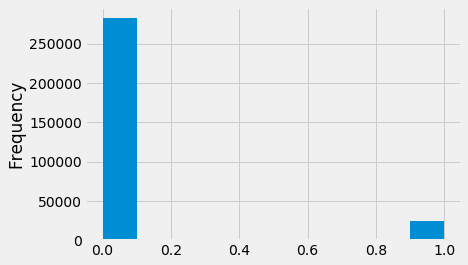

In [55]:
app_train['TARGET'].plot.hist();

The traget represents an imbalanced class problem, where far more loans that were repaid on time than loans that were not repaid. This problem can be solved by using machine learning models.

## 2. Missing value treatment

In [56]:
# Function to calculate missing values by column# 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Number of columns in \'application_train\' Data: " + str(df.shape[1]) + 
               "\nColumns with missing Values: " + str(mis_val_table_ren_columns.shape[0]))
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [57]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head()

Number of columns in 'application_train' Data: 122
Columns with missing Values: 67


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4


Missing data can lead to wrong prediction or classification. There are 122 columns in the training data and 67 of them contain missing values. Most of the missing value columns contains more than 50% of missing values. Deleting the missing values is not a good option for this case. We can use imputation to fill in the missing values. XGBoost, LightGBM or other algorithm can be used to deal with the missing values.

## 3. Outlier Detection and Treatment

### 3.1. Encoding Categorical Variables

In [58]:
# Number of each type of column
print("Number of each type of column: \n{}".format(app_train.dtypes.value_counts()))

Number of each type of column: 
float64    65
int64      41
object     16
dtype: int64


In [59]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [60]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


We will use Label Encoding for those categorical variables which have only two categories. In our training data set we have only 3 such categorical variables. The rest of the categorical variables are encoded using One-Hot Encoding.

In [61]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### 3.2. Outlier Detection

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64


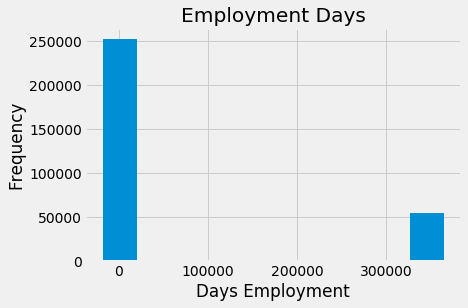

In [62]:
print((app_train['DAYS_EMPLOYED']/365).describe())
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Employment Days');
plt.xlabel('Days Employment');

The days of employment column contains outliers. The maximum employment days can not be 1000 years. All the outliers in days of employment column have the exact same value. Therefore, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

### 3.3. Outlier Treatment

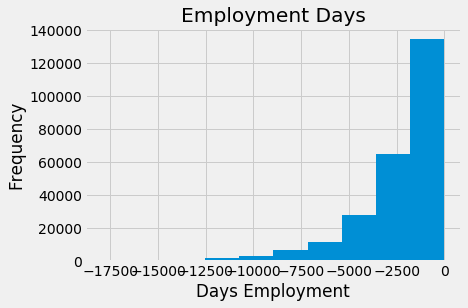

In [63]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Employment Days');
plt.xlabel('Days Employment');

In [64]:
# We will create the new column and fill in the existing column with np.nan in the testing data.
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

## 4. Correlations

The Pearson correlation coefficient gives the correlations between a variable and the target. It gives us an idea of possible relationships within the data. We will calculate correlation between every variable and the target to understand their relevance.

### Correlation Matrix & Heatmap

In [65]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

#### Effect of Age on Repayment

One of the significant positive correlations with TARGET is the DAYS_BIRTH.

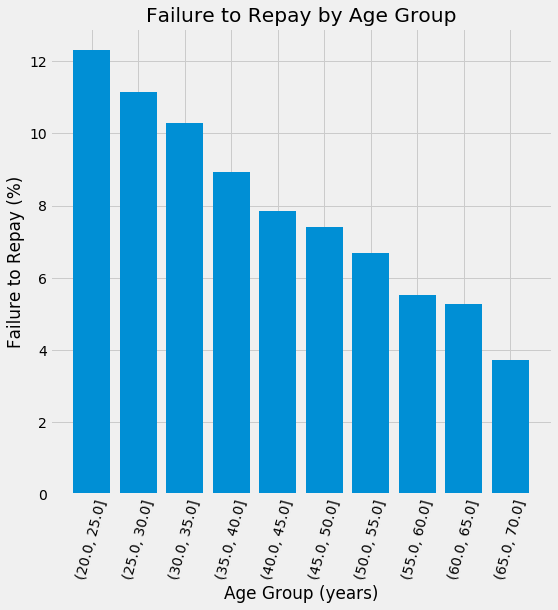

In [66]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = np.abs(age_data['DAYS_BIRTH'] / 365)

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()

# Set the style of plots
plt.style.use('fivethirtyeight')

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

From figure it is clear that the younger applicants are more likely to not repay the loan.

#### Effect of Exterior Sources

EXT_SOURCE_3, EXT_SOURCE_2, and EXT_SOURCE_1 are the variables which have the strongest negative correlations with the TARGET varable.

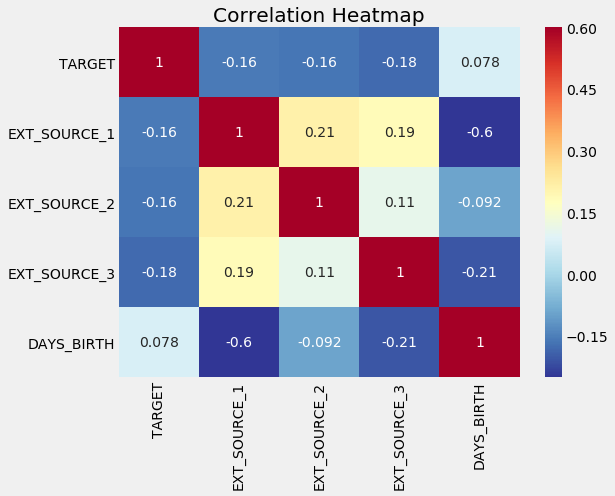

In [67]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

The variables EXT_SOURCE have negative correlations with the TARGET variable. Client more likely to repay the loan when the value of the EXT_SOURCE increases.

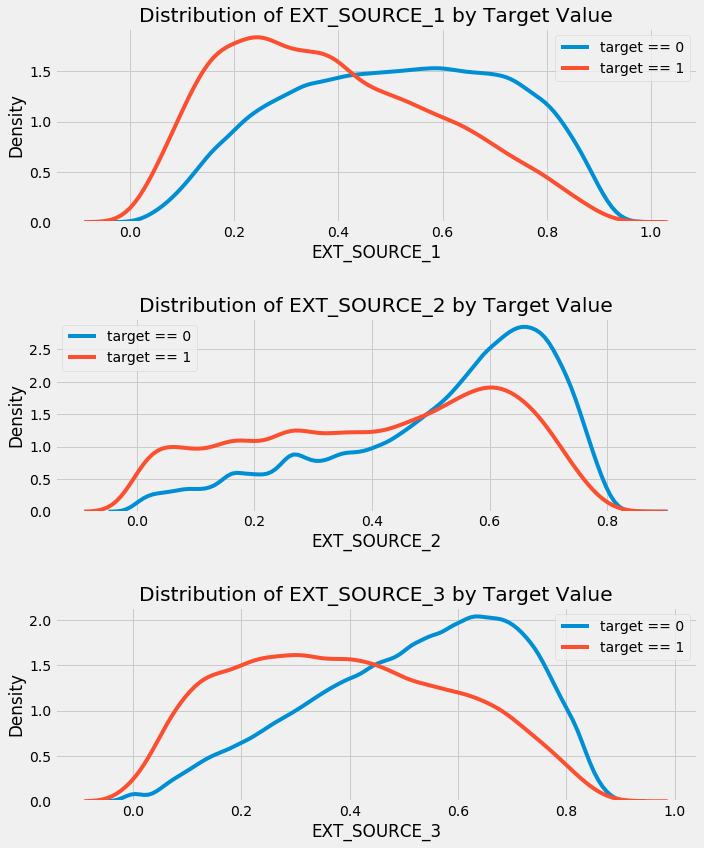

In [68]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

From the figure we can observe that the variable EXT_SOURCE_3 shows the greatest difference between the values of the target. Client more likely to repay the loan if the value of the EXT_SOURCE_3 variable is higher.

#### Pairs Plot

The Pairs Plot lets us see relationships between multiple pairs of variables as well as distributions of single variables.

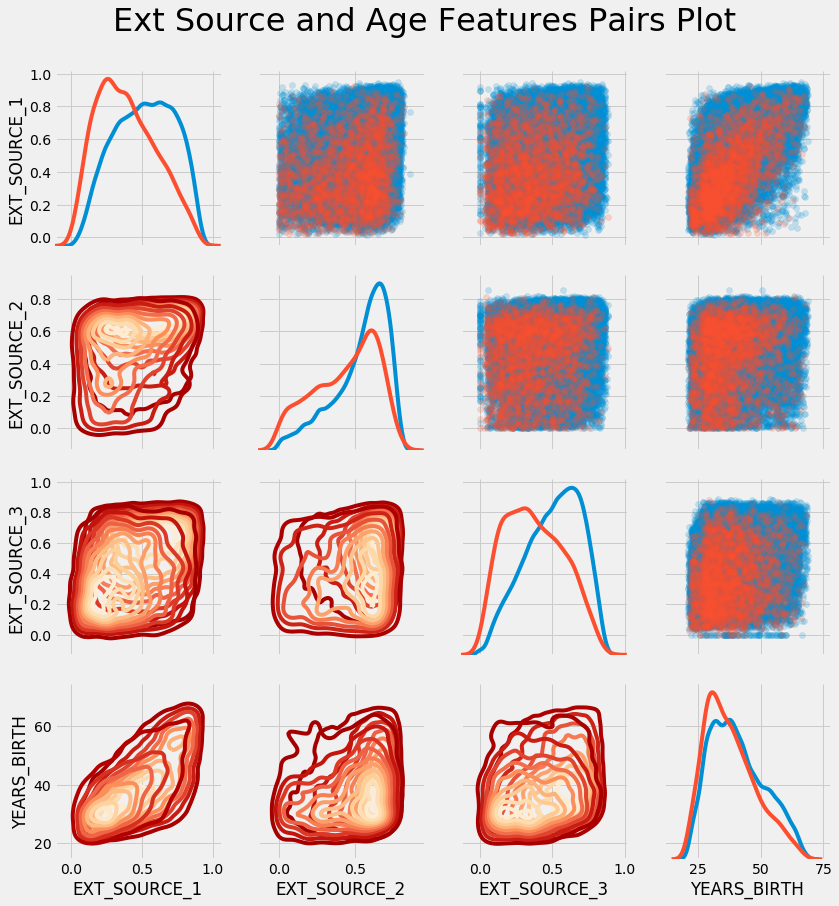

In [69]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. There is a moderate positive linear relationship between the variables EXT_SOURCE_1 and the DAYS_BIRTH.


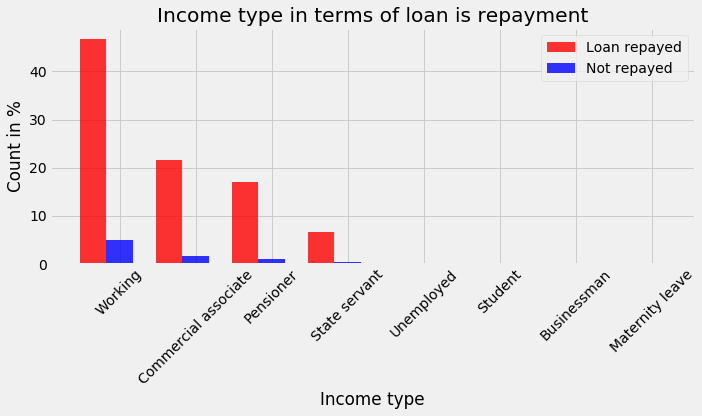

In [79]:
# Plot Income type in terms of loan is repayed or not
train_data = pd.read_csv("./Data_Files/application_train.csv")
plot_data = train_data["NAME_INCOME_TYPE"].value_counts()
repayed_n = []
repayed_y = []
for val in plot_data.index:
    repayed_n.append(np.sum(train_data["TARGET"][train_data["NAME_INCOME_TYPE"]==val] == 1))
    repayed_y.append(np.sum(train_data["TARGET"][train_data["NAME_INCOME_TYPE"]==val] == 0))    

loan_repayed  = (repayed_y / plot_data.sum()) * 100
loan_not_payed = (repayed_n / plot_data.sum()) * 100

fig, ax = plt.subplots(figsize = (10, 6))
index = np.arange(len(plot_data.index))
bar_width = 0.35
opacity = 0.8

repayed_plot = plt.bar(index, loan_repayed, bar_width, alpha=opacity, color='r', label='Loan repayed')
no_pay_plot = plt.bar(index + bar_width, loan_not_payed, bar_width, alpha=opacity, color='b', label='Not repayed')

plt.xlabel('Income type')
plt.ylabel('Count in %')
plt.title('Income type in terms of loan is repayment')
plt.xticks(index + bar_width, plot_data.index, rotation=45)
plt.legend()
plt.style.use('fivethirtyeight')
plt.tight_layout(h_pad = 2.5)
plt.show()

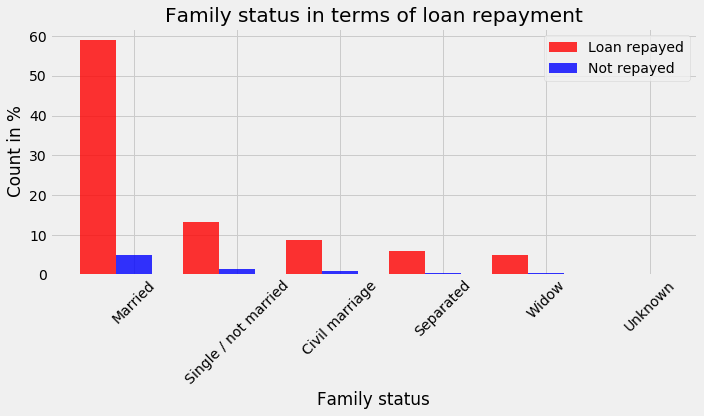

In [80]:
# Plot Family status in terms of loan is repayed or not

plot_data = train_data["NAME_FAMILY_STATUS"].value_counts()
repayed_n = []
repayed_y = []
for val in plot_data.index:
    repayed_n.append(np.sum(train_data["TARGET"][train_data["NAME_FAMILY_STATUS"]==val] == 1))
    repayed_y.append(np.sum(train_data["TARGET"][train_data["NAME_FAMILY_STATUS"]==val] == 0))    

loan_repayed  = (repayed_y / plot_data.sum()) * 100
loan_not_payed = (repayed_n / plot_data.sum()) * 100
# create plot
fig, ax = plt.subplots(figsize = (10, 6))
index = np.arange(len(plot_data.index))
bar_width = 0.35
opacity = 0.8

repayed_plot = plt.bar(index, loan_repayed, bar_width, alpha=opacity, color='r', label='Loan repayed')
no_pay_plot = plt.bar(index + bar_width, loan_not_payed, bar_width, alpha=opacity, color='b', label='Not repayed')

plt.xlabel('Family status')
plt.ylabel('Count in %')
plt.title('Family status in terms of loan repayment')
plt.xticks(index + bar_width, plot_data.index, rotation=45)
plt.legend()
plt.style.use('fivethirtyeight')
plt.tight_layout(h_pad = 2.5)
plt.show()

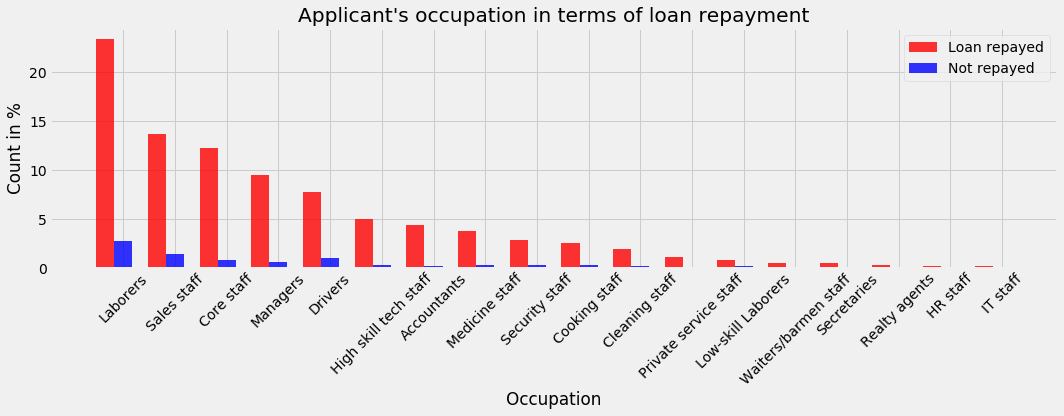

In [81]:
# Plot Occupation of the applicant\'s in terms of loan is repayed or not

plot_data = train_data["OCCUPATION_TYPE"].value_counts()
repayed_n = []
repayed_y = []
for val in plot_data.index:
    repayed_n.append(np.sum(train_data["TARGET"][train_data["OCCUPATION_TYPE"]==val] == 1))
    repayed_y.append(np.sum(train_data["TARGET"][train_data["OCCUPATION_TYPE"]==val] == 0))    

loan_repayed  = (repayed_y / plot_data.sum()) * 100
loan_not_payed = (repayed_n / plot_data.sum()) * 100
# create plot
fig, ax = plt.subplots(figsize = (15, 6))
index = np.arange(len(plot_data.index))
bar_width = 0.35
opacity = 0.8

repayed_plot = plt.bar(index, loan_repayed, bar_width, alpha=opacity, color='r', label='Loan repayed')
no_pay_plot = plt.bar(index + bar_width, loan_not_payed, bar_width, alpha=opacity, color='b', label='Not repayed')

plt.xlabel('Occupation')
plt.ylabel('Count in %')
plt.title('Applicant\'s occupation in terms of loan repayment')
plt.xticks(index + bar_width, plot_data.index, rotation=45)
plt.legend()
plt.style.use('fivethirtyeight')
plt.tight_layout(h_pad = 2.5)
plt.show()

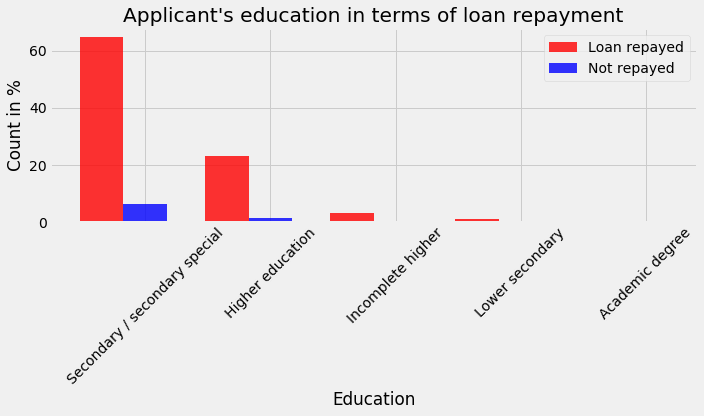

In [82]:
# Plot Applicant\'s education in terms of loan is repayed or not

plot_data = train_data["NAME_EDUCATION_TYPE"].value_counts()
repayed_n = []
repayed_y = []
for val in plot_data.index:
    repayed_n.append(np.sum(train_data["TARGET"][train_data["NAME_EDUCATION_TYPE"]==val] == 1))
    repayed_y.append(np.sum(train_data["TARGET"][train_data["NAME_EDUCATION_TYPE"]==val] == 0))    

loan_repayed  = (repayed_y / plot_data.sum()) * 100
loan_not_payed = (repayed_n / plot_data.sum()) * 100
# create plot
fig, ax = plt.subplots(figsize = (10, 6))
index = np.arange(len(plot_data.index))
bar_width = 0.35
opacity = 0.8

repayed_plot = plt.bar(index, loan_repayed, bar_width, alpha=opacity, color='r', label='Loan repayed')
no_pay_plot = plt.bar(index + bar_width, loan_not_payed, bar_width, alpha=opacity, color='b', label='Not repayed')

plt.xlabel('Education')
plt.ylabel('Count in %')
plt.title('Applicant\'s education in terms of loan repayment')
plt.xticks(index + bar_width, plot_data.index, rotation=45)
plt.legend()
plt.style.use('fivethirtyeight')
plt.tight_layout(h_pad = 2.5)
plt.show()

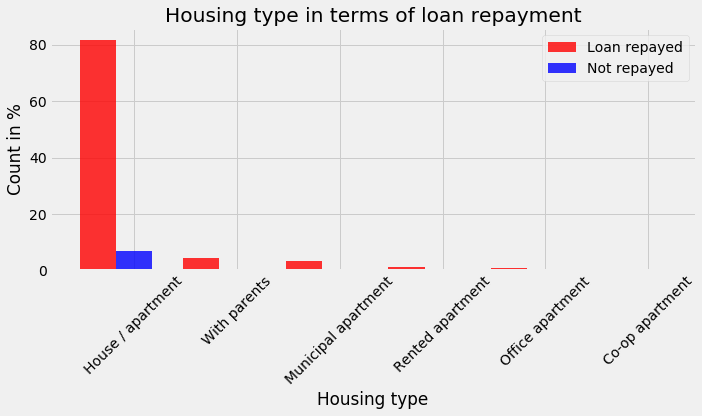

In [83]:
# Plot Applicant\'s Housing type in terms of loan is repayed or not 

plot_data = train_data["NAME_HOUSING_TYPE"].value_counts()
repayed_n = []
repayed_y = []
for val in plot_data.index:
    repayed_n.append(np.sum(train_data["TARGET"][train_data["NAME_HOUSING_TYPE"]==val] == 1))
    repayed_y.append(np.sum(train_data["TARGET"][train_data["NAME_HOUSING_TYPE"]==val] == 0))    

loan_repayed  = (repayed_y / plot_data.sum()) * 100
loan_not_payed = (repayed_n / plot_data.sum()) * 100
# create plot
fig, ax = plt.subplots(figsize = (10, 6))
index = np.arange(len(plot_data.index))
bar_width = 0.35
opacity = 0.8

repayed_plot = plt.bar(index, loan_repayed, bar_width, alpha=opacity, color='r', label='Loan repayed')
no_pay_plot = plt.bar(index + bar_width, loan_not_payed, bar_width, alpha=opacity, color='b', label='Not repayed')

plt.xlabel('Housing type')
plt.ylabel('Count in %')
plt.title('Housing type in terms of loan repayment')
plt.xticks(index + bar_width, plot_data.index, rotation=45)
plt.legend()
plt.style.use('fivethirtyeight')
plt.tight_layout(h_pad = 2.5)
plt.show()

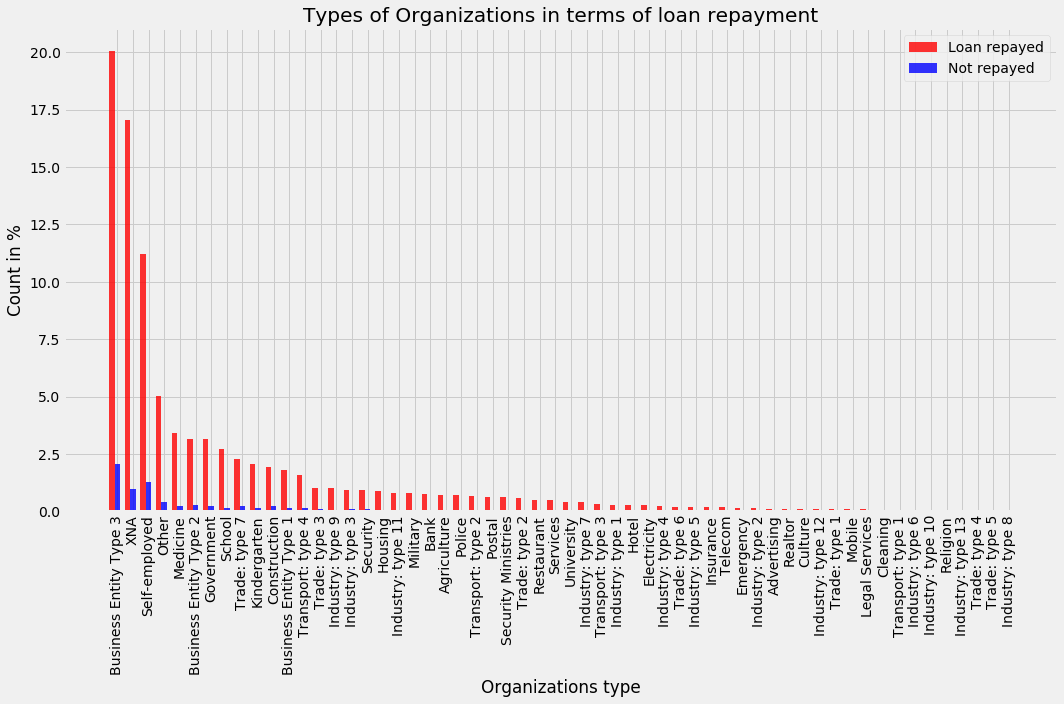

In [84]:
# Plot Types of Organizations of the Applicant\'s in terms of loan is repayed or not 

plot_data = train_data["ORGANIZATION_TYPE"].value_counts()
repayed_n = []
repayed_y = []
for val in plot_data.index:
    repayed_n.append(np.sum(train_data["TARGET"][train_data["ORGANIZATION_TYPE"]==val] == 1))
    repayed_y.append(np.sum(train_data["TARGET"][train_data["ORGANIZATION_TYPE"]==val] == 0))    

loan_repayed  = (repayed_y / plot_data.sum()) * 100
loan_not_payed = (repayed_n / plot_data.sum()) * 100
# create plot
fig, ax = plt.subplots(figsize = (15, 10))
index = np.arange(len(plot_data.index))
bar_width = 0.35
opacity = 0.8

repayed_plot = plt.bar(index, loan_repayed, bar_width, alpha=opacity, color='r', label='Loan repayed')
no_pay_plot = plt.bar(index + bar_width, loan_not_payed, bar_width, alpha=opacity, color='b', label='Not repayed')

plt.xlabel('Organizations type')
plt.ylabel('Count in %')
plt.title('Types of Organizations in terms of loan repayment')
plt.xticks(index + bar_width, plot_data.index, rotation=90)
plt.legend()
plt.style.use('fivethirtyeight')
plt.tight_layout(h_pad = 2.5)
plt.show()

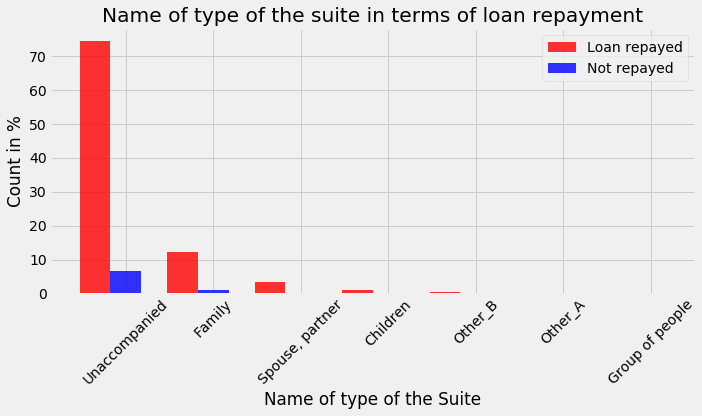

In [85]:
# Plot Name of type of the suite of the Applicant\'s in terms of loan is repayed or not 

plot_data = train_data["NAME_TYPE_SUITE"].value_counts()
repayed_n = []
repayed_y = []
for val in plot_data.index:
    repayed_n.append(np.sum(train_data["TARGET"][train_data["NAME_TYPE_SUITE"]==val] == 1))
    repayed_y.append(np.sum(train_data["TARGET"][train_data["NAME_TYPE_SUITE"]==val] == 0))    

loan_repayed  = (repayed_y / plot_data.sum()) * 100
loan_not_payed = (repayed_n / plot_data.sum()) * 100
# create plot
fig, ax = plt.subplots(figsize = (10, 6))
index = np.arange(len(plot_data.index))
bar_width = 0.35
opacity = 0.8

repayed_plot = plt.bar(index, loan_repayed, bar_width, alpha=opacity, color='r', label='Loan repayed')
no_pay_plot = plt.bar(index + bar_width, loan_not_payed, bar_width, alpha=opacity, color='b', label='Not repayed')

plt.xlabel('Name of type of the Suite')
plt.ylabel('Count in %')
plt.title('Name of type of the suite in terms of loan repayment')
plt.xticks(index + bar_width, plot_data.index, rotation=45)
plt.legend()
plt.style.use('fivethirtyeight')
plt.tight_layout(h_pad = 2.5)
plt.show()